In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Preview gambar


In [ ]:
image_path = "kucing.png"

# baca gambar
image_bytes = tf.io.read_file(image_path)

# decode gambar menjadi tensor
image_tensor = tf.image.decode_image(image_bytes)

# tampilkan gambar
plt.imshow(image_tensor)
plt.show()

### Helper Function

In [7]:
def visualize_data(original_image,process_image):
    plt.figure(figsize=(10 , 5))

    # gambar original
    plt.subplot(1,2,1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    # gambar preprocess
    plt.subplot(1,2,2)
    plt.imshow(process_image)
    plt.title("Processed Image")
    plt.axis("off")

    plt.show()


### Position Augmentation

### Random vertical FLip

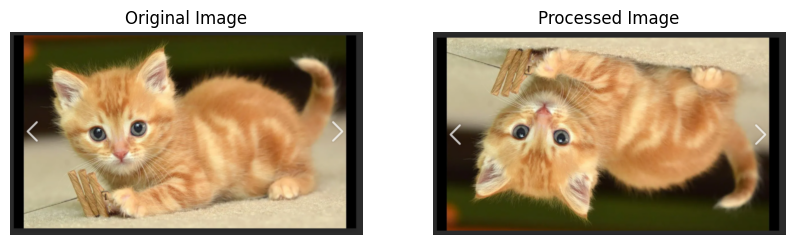

In [8]:
vertical_image = tf.image.random_flip_up_down(image_tensor)
visualize_data(image_tensor,vertical_image)

### Random Horizontal flip

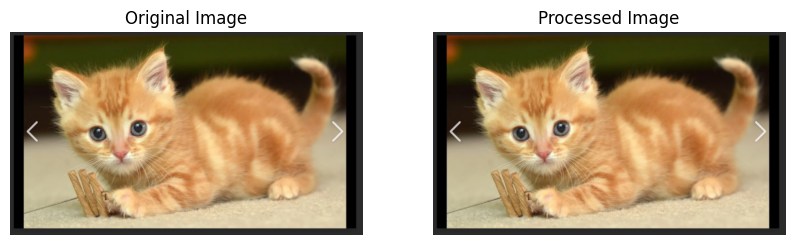

In [10]:
horizontal_image = tf.image.random_flip_up_down(image_tensor)
visualize_data(image_tensor,horizontal_image)

### Colour Augmetation

## brightness

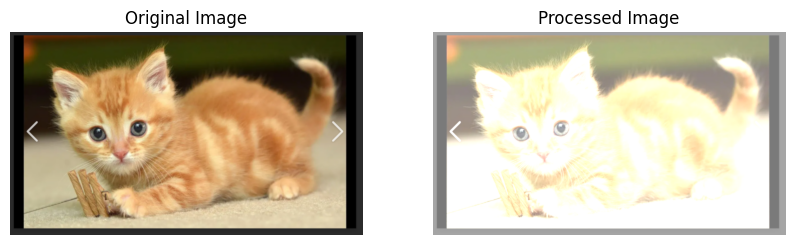

In [14]:
max_delta = 0.8

gambar_terang = tf.image.random_brightness(
    image_tensor,
    max_delta
)

visualize_data(image_tensor,gambar_terang)

### Contrast

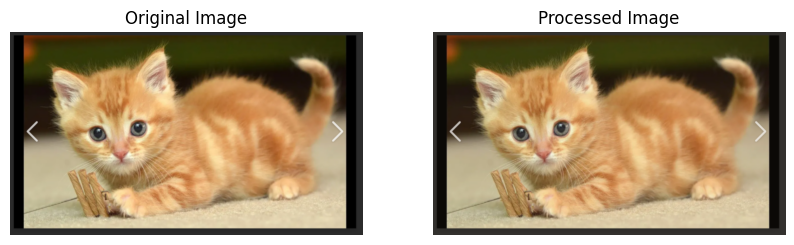

In [16]:
min_delta = 0.5
max_delta = 1.5

gambar_contrast = tf.image.random_contrast(
    image_tensor,
    min_delta,
    max_delta
)

visualize_data(image_tensor,gambar_contrast)

### ImagedataGenrator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## import library

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Buat Datagen

In [19]:
IMG_PATH = "Villains"

img_datagen = ImageDataGenerator(
    rotation_range = 0.45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

### Simpan Hasil Augmentasi

In [27]:
img_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,

    #Parameter untuk menyimpan data 
    class_mode = "categorical",
    save_to_dir = "Augmented",
    save_prefix = "aug",
    save_format = "jpg"
)

Found 100 images belonging to 6 classes.


In [31]:
for i in range(5):
    img_generator.next()

## Modeling

In [37]:
img_datagen = ImageDataGenerator(
    rescale = 1./ 255,
    validation_split = 0.1
)

train_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    subset = 'training',
    class_mode = "categorical",
)
val_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    subset = 'validation', 
    class_mode = "categorical",
)


Found 90 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


### buat arsitektur

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3),activation="relu",input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(5,activation="sigmoid")
])

In [48]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [49]:
history = model.fit(train_generator,validation_data = val_generator,
                    epochs=10)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 7.2699 - accuracy: 0.1333 - val_loss: 3.6056 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 3.3345 - accuracy: 0.1889 - val_loss: 1.8459 - val_accuracy: 0.3000
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 1.5390 - accuracy: 0.3000 - val_loss: 1.7193 - val_accuracy: 0.3000
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.4362 - accuracy: 0.3222 - val_loss: 1.3978 - val_accuracy: 0.3000
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 1.1079 - accuracy: 0.5333 - val_loss: 1.4813 - val_accuracy: 0.4000
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.9584 - accuracy: 0.6333 - val_loss: 1.1746 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.8183 - accuracy: 0.6556 - val_loss: 1.2555 - val_accuracy: 0.4000
Epoch 8/10
3/3 [=========================